Source:

- https://www.kaggle.com/datasets/ardikasatria/datasettanamanpadisumatera/code
- https://www.kaggle.com/code/alexkhoe/rice-production-prediction-on-sumatera-island
- https://colab.research.google.com/drive/126mMPlMc-ZXvzXX-VU0nYAjqZEUr9UDk

In [ ]:
%pip install lime
%pip install pandas
%pip install seaborn

In [ ]:
%pip install Jinja2

1. Data Understanding

A. Collection

In [ ]:
# Import Library yang Dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset
data = pd.read_csv('/content/Data_Tanaman_Padi_Sumatera_version_1 (1).csv')

# Melihat Isi Data
data.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


B. Exploration

In [ ]:
# Memeriksa Baris dan Kolom pada Dataset
data.shape

(224, 7)

In [ ]:
# Melihat Informasi pada Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


2. Data Preparation

A. Cleaning

In [ ]:
# Mencari Data Null
data.isnull().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

In [ ]:
# Melihat Deskripsi Statistik Data secara Keseluruhan
data.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


B. Visualization

<ipython-input-102-762f6d515b71>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Provinsi', y='Produksi', data=data, palette=colors)


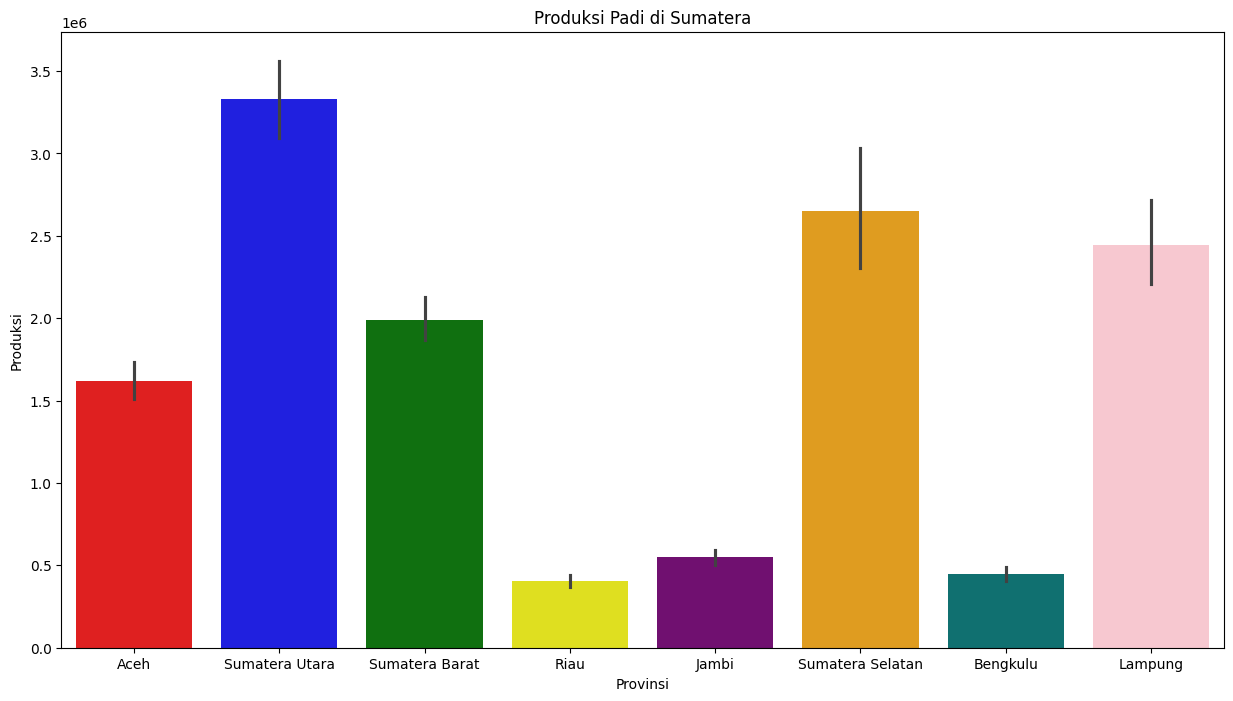

In [ ]:
## Barplot Produksi Padi Setiap Provinsi di Sumatera

# Buat list berisi warna yang ingin digunakan
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'teal', 'pink']

# Menampilkan Barplot Produksi Padi Setiap Provinsi di Sumatera
plt.figure(figsize=(15,8))
plt.title('Produksi Padi di Sumatera')
sns.barplot(x='Provinsi', y='Produksi', data=data, palette=colors)
plt.show()

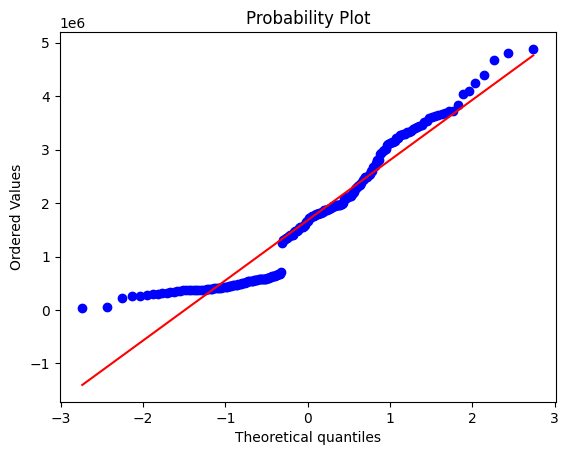

In [ ]:
# Plot Statistik
import scipy.stats as stats
import pylab as py

# QQ-plot (Quantile-Quantile Plot)
stats.probplot(data['Produksi'], dist='norm', plot=py)
py.show()

<Axes: >

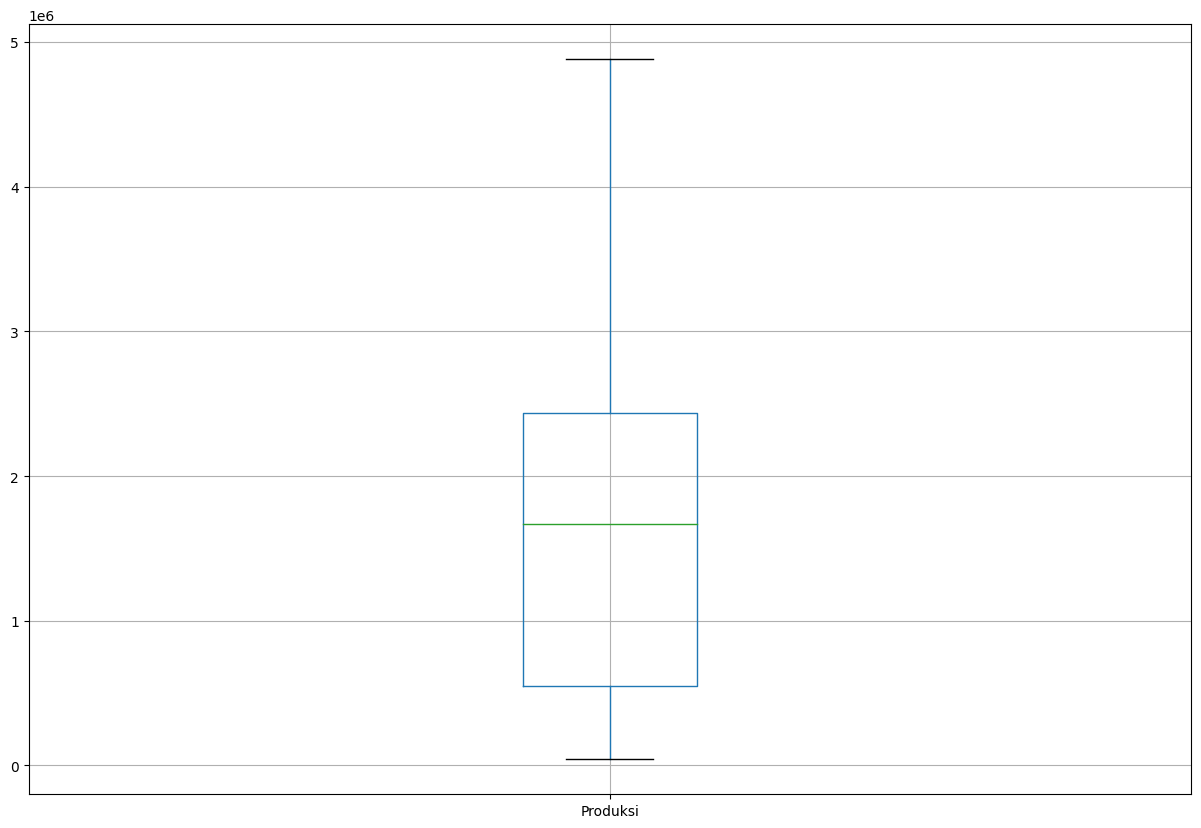

In [ ]:
# Visualisasi dari Plot Boxplot Produksi Padi
data[['Produksi']].boxplot(figsize=(15,10))

C. Data Preprocessing

1) Matriks Korelasi dan Penambahan Fitur

In [ ]:
# Membuat Kolom Data

data.columns

cols = list(data.columns)
df = data.copy()
df = df[cols[0:2] + cols[3:7] + [cols[2]]]
df.tail()

,Provinsi,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
219,Lampung,2016,390799.00,2317.6,79.40,26.45,3831923.00
220,Lampung,2017,396559.00,1825.1,77.04,26.36,4090654.00
221,Lampung,2018,511940.93,1385.8,76.05,25.50,2488641.91
222,Lampung,2019,464103.42,1706.4,78.03,27.23,2164089.33
223,Lampung,2020,545149.05,2211.3,75.80,24.58,2604913.29


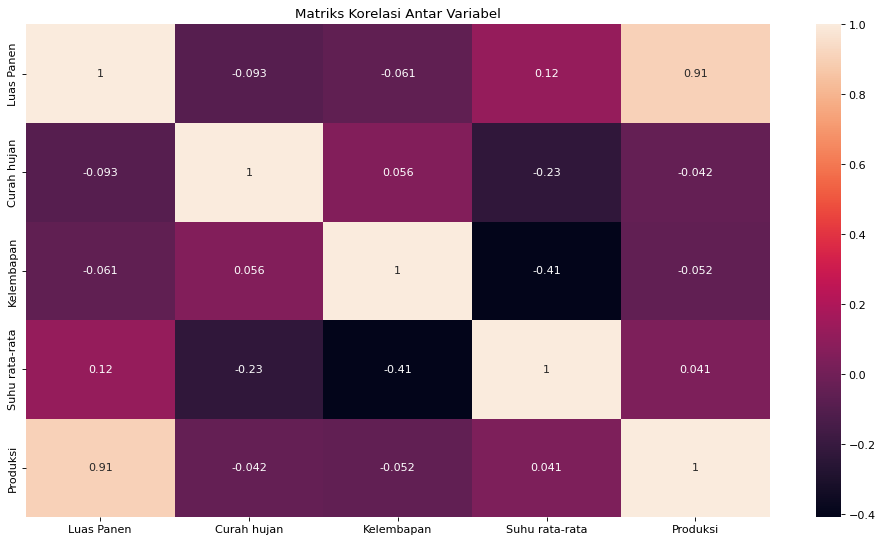

In [ ]:
# Korelasi Antar Variabel

fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(df.loc[:, 'Luas Panen':'Produksi'].corr(), cmap='rocket', annot=True)
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

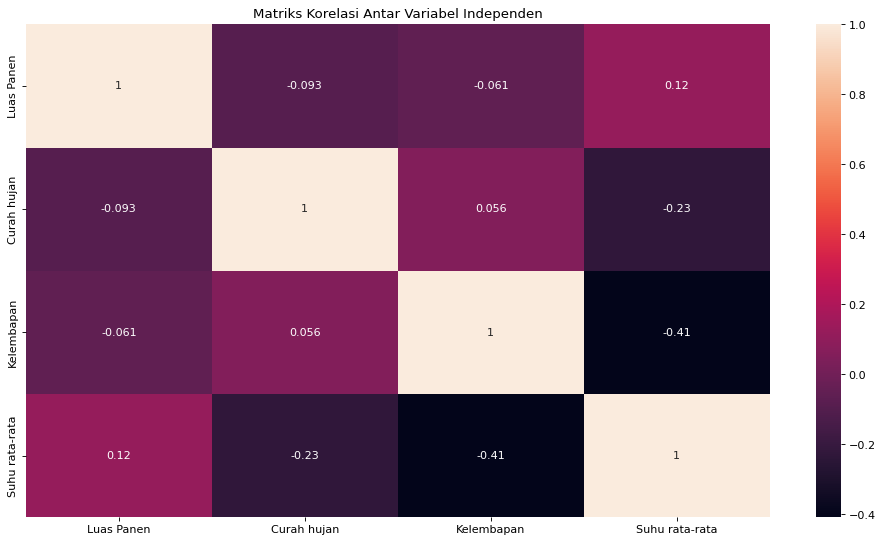

In [ ]:
# Korelasi Antar Variabel Independen

fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(df.loc[:, 'Luas Panen':'Suhu rata-rata'].corr(),
            cmap='rocket', annot=True)
plt.title('Matriks Korelasi Antar Variabel Independen')
plt.show()

In [ ]:
# Penambahan Fitur (Feature Encoding)

from sklearn.preprocessing import OneHotEncoder
string_feat = ['Provinsi']
ohe = OneHotEncoder()
ohe.fit(df[string_feat])
data_ohe_res = pd.DataFrame(ohe.transform(df[string_feat]).toarray(),
                          columns=ohe.get_feature_names_out())
df = pd.concat([df, data_ohe_res], axis=1)
df = df.drop(columns=string_feat)
df.head()

,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
0,1993,323589.0,1627.0,82.00,26.06,1329536.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,329041.0,1521.0,82.12,26.92,1299699.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1995,339253.0,1476.0,82.72,26.27,1382905.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1996,348223.0,1557.0,83.00,26.08,1419128.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1997,337561.0,1339.0,82.46,26.31,1368074.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Pemilihan Fitur
df = df.drop(columns='Tahun')
df.tail()

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
219,390799.00,2317.6,79.40,26.45,3831923.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
220,396559.00,1825.1,77.04,26.36,4090654.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
221,511940.93,1385.8,76.05,25.50,2488641.91,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
222,464103.42,1706.4,78.03,27.23,2164089.33,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
223,545149.05,2211.3,75.80,24.58,2604913.29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


2) Data Training dan Data Testing

In [ ]:
# Menentukan Data Latih dan Data Uji
x = df.drop('Produksi',axis=1)
y = df[['Produksi']]

In [ ]:
# Menampilkan Data Latih dan Data Uji
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (156, 12)
x_test : (68, 12)
y_train : (156, 1)
y_test : (68, 1)


In [ ]:
X_train = x_train
X_test = x_test

X_train[:5]

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
166,539316.52,1655.5,85.13,27.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40,822073.00,776.7,83.80,27.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,320789.00,506.5,80.80,26.73,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,159463.00,2508.1,71.28,29.39,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89,126280.00,2233.0,84.26,26.73,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y_test.tail()

,Produksi
186,502552.0
61,1807622.0
52,4669777.5
66,1823739.0
26,1714437.6


In [ ]:
# Standarisasi

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [ ]:
x_train[:5]

array([[ 0.71669991, -0.83956692,  0.93754178,  0.69231249, -0.36115756,
        -0.40519021, -0.38348249, -0.36115756, -0.37240587, -0.37240587,
         2.76887462, -0.40519021],
       [ 1.92735709, -1.70505807,  0.63626219,  0.20923176, -0.36115756,
        -0.40519021, -0.38348249, -0.36115756, -0.37240587, -0.37240587,
        -0.36115756,  2.46797672],
       [-0.21895294, -1.97116607, -0.04331584, -0.00815457,  2.76887462,
        -0.40519021, -0.38348249, -0.36115756, -0.37240587, -0.37240587,
        -0.36115756, -0.40519021],
       [-0.90969035,  0.00012102, -2.19984345,  2.13350335, -0.36115756,
        -0.40519021,  2.60768096, -0.36115756, -0.37240587, -0.37240587,
        -0.36115756, -0.40519021],
       [-1.05176751, -0.27081277,  0.74046415, -0.00815457, -0.36115756,
        -0.40519021, -0.38348249, -0.36115756,  2.68524232, -0.37240587,
        -0.36115756, -0.40519021]])

In [ ]:
np.set_printoptions(suppress=True)
print(x_train[:5])
print(y_train[:5])

[[ 0.71669991 -0.83956692  0.93754178  0.69231249 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587  2.76887462 -0.40519021]
 [ 1.92735709 -1.70505807  0.63626219  0.20923176 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756  2.46797672]
 [-0.21895294 -1.97116607 -0.04331584 -0.00815457  2.76887462 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-0.90969035  0.00012102 -2.19984345  2.13350335 -0.36115756 -0.40519021
   2.60768096 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-1.05176751 -0.27081277  0.74046415 -0.00815457 -0.36115756 -0.40519021
  -0.38348249 -0.36115756  2.68524232 -0.37240587 -0.36115756 -0.40519021]]
[[ 0.77273334]
 [ 1.48736091]
 [-0.11743608]
 [-0.94191188]
 [-1.11821706]]


In [ ]:
print(x_train.min())
print(x_train.max())

-3.6634654470384587
2.7688746209726918


In [ ]:
print(y_train.min())
print(y_train.max())

-1.3819365029127002
2.7012953756267932


In [ ]:
print(x_test[:5])
print(y_test[:5])

[[-1.07170771 -0.31302577  0.53326331 -0.34207301 -0.4152274  -0.31108551
  -0.36514837 -0.4152274   2.56038192 -0.39056673 -0.4152274  -0.31108551]
 [ 0.51064077 -0.79631917  0.34793546  1.18107828 -0.4152274  -0.31108551
  -0.36514837  2.40831892 -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.2012385  -0.26857953  0.77401631 -1.18826817 -0.4152274   3.21455025
  -0.36514837 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.23204632 -0.12562823  0.49169445 -0.30446434 -0.4152274  -0.31108551
   2.73861279 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.11782994  0.78499627  0.58002828 -0.51131204 -0.4152274   3.21455025
  -0.36514837 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]]
[[-1.11263695]
 [ 0.26419173]
 [-1.19391204]
 [-0.88288197]
 [-1.07069477]]


3. Modeling

In [ ]:
# Mengimpor Model ML yang akan Digunakan
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

A. Regresi Linear

In [ ]:
# Membuat Algoritma Regresi
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Membuat Prediksi Algoritma Regresi
ypred_LinReg = sc.inverse_transform(LinReg.predict(x_test).reshape(-1,1))
y_pred_LinReg = pd.DataFrame(ypred_LinReg)
y_pred_LinReg.tail()

,0
63,3.111825e+05
64,2.076688e+06
65,2.727175e+06
66,1.934337e+06
67,1.553306e+06


<ipython-input-123-1668ee823513>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test), hist=False, label='Actual')
<ipython-input-123-1668ee823513>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_LinReg, hist=False, label='Predicted')


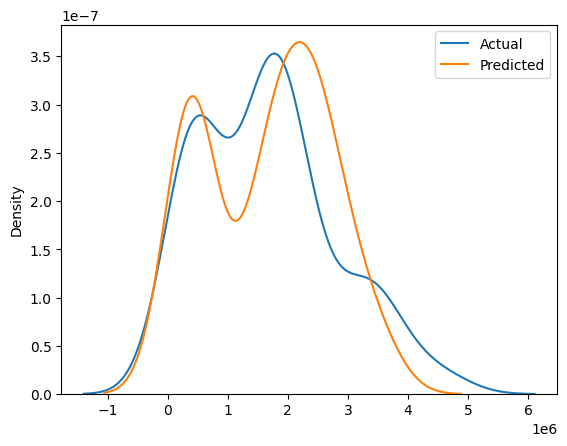

In [ ]:
# Visualisasi Hasil Prediksi
sns.distplot(sc.inverse_transform(y_test), hist=False, label='Actual')
sns.distplot(y_pred_LinReg, hist=False, label='Predicted')
plt.legend()

In [ ]:
# Memeriksa Akurasi Pengujian dan Pelatihan Algoritma Regresi
print('Linear Regression')
LinReg_train = LinReg.score(x_train,y_train)*100
LinReg_test = LinReg.score(x_test, y_test)*100

# Menjalankan Algoritma dengan Membagi 10 Sampel Data Acak
LinReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_score = cross_val_score(LinReg,x,y,cv=LinReg_cv)

# Menampilkan Hasil Nilai Algoritma
print('Train : ',LinReg_train)
print('Test  : ',LinReg_test, '\n')
print('The Average Cross Validation Score is',
      np.round(np.mean(LinReg_score)*100,2))

Linear Regression
Train :  84.68578496928782
Test  :  86.37276105524144 

The Average Cross Validation Score is 82.9


In [ ]:
# Membuat Hyperparameter Tuning pada Algoritma yang Digunakan
LinReg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
# Membuat Hyperparameter Tuning
param_grid = dict(
    copy_X=[True, False],
    fit_intercept=[True, False],
    n_jobs=np.arange(1,11),
    positive=[True, False],
)

LinReg_tuning = LinearRegression()

LinReg_search = GridSearchCV(estimator=LinReg_tuning,
                           param_grid=param_grid,
                           scoring='r2')

LinReg_best_model = LinReg_search.fit(x_train, y_train)
print('Optimum parameters', LinReg_best_model.best_params_)
print('Best score is {}'.format(LinReg_best_model.best_score_))

Optimum parameters {'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': True}
Best score is 0.8387472527255266


In [ ]:
# Memasukkan Model Algoritma yang Sudah Dimodifikasi dengan Hyperparameter
from sklearn.linear_model import LinearRegression
LinReg_model = LinearRegression(copy_X= True, fit_intercept= False, n_jobs= 1,
                                positive= True)
LinReg_model.fit(x_train, y_train)

LinearRegression(fit_intercept=False, n_jobs=1, positive=True)

In [ ]:
# Membuat Prediksi Algoritma Regresi yang Dimodifikasi
ypred_LinReg_model = sc.inverse_transform(LinReg_model.predict(x_test).reshape(-1,1))
ypred_LinReg_model = pd.DataFrame(ypred_LinReg_model)
ypred_LinReg_model.tail()

,0
63,4.556448e+05
64,2.049707e+06
65,2.917382e+06
66,1.980058e+06
67,1.487799e+06


<ipython-input-129-3147cae58387>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-129-3147cae58387>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_LinReg_model,hist=False,label='Predicted')


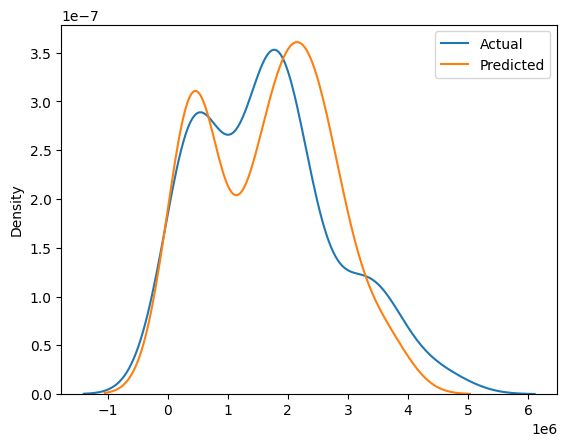

In [ ]:
# Visualisasi Hasil Prediksi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_LinReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
# Memeriksa Akurasi Pengujian dan Pelatihan Algoritma Regresi
print('Linear Regression')
LinReg_model_train = LinReg_model.score(x_train,y_train)*100
LinReg_model_test = LinReg_model.score(x_test, y_test)*100

# Menjalankan Algoritma dengan Membagi 10 Sampel Data Acak
LinReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

# Menampilkan Hasil Nilai Algoritma
print('Train : ',LinReg_model_train)
print('Test  : ',LinReg_model_test, '\n')
print('The Average Cross Validation Score is',
      np.round(np.mean(LinReg_model_score)*100,2))

Linear Regression
Train :  84.6508189494205
Test  :  86.89566591106708 

The Average Cross Validation Score is 83.0


Skor Validasi Akhir = 83.0

B. Random Forest Regressor

In [ ]:
# Membuat Algoritma Regresi
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0)
RFReg.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=0)

In [ ]:
# Membuat Prediksi Algoritma Regresi
ypred_RFReg = sc.inverse_transform(RFReg.predict(x_test).reshape(-1,1))
y_pred_RFReg = pd.DataFrame(ypred_RFReg)
y_pred_RFReg.tail()

,0
63,4.490402e+05
64,1.875380e+06
65,2.600398e+06
66,1.951832e+06
67,2.114010e+06


<ipython-input-133-57f007e5b007>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-133-57f007e5b007>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_RFReg,hist=False,label='Predicted')


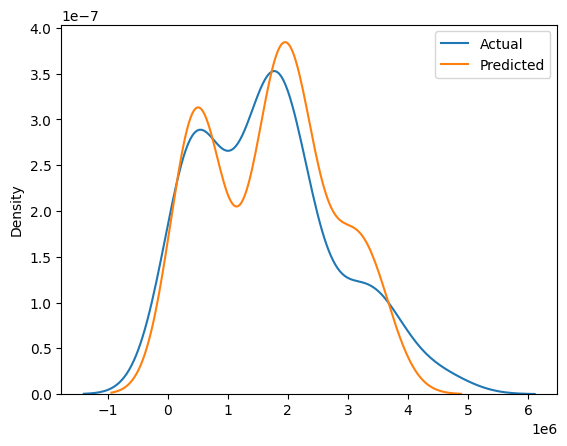

In [ ]:
# Visualisasi Hasil Prediksi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_RFReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
# Memeriksa Akurasi Pengujian dan Pelatihan Algoritma Regresi
print('Random Forest Regression')
RFReg_train = RFReg.score(x_train,y_train.ravel())*100
RFReg_test = RFReg.score(x_test, y_test)*100

# Menjalankan Algoritma dengan Membagi 10 Sampel Data Acak
RFReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_score = cross_val_score(RFReg,x,y,cv=RFReg_cv)

# Menampilkan Hasil Nilai Algoritma
print('Train : ',RFReg_train)
print('Test  : ',RFReg_test, '\n')
print('The Average Cross Validation Score is',
      np.round(np.mean(RFReg_score)*100,2))

Random Forest Regression


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Train :  95.23971349396201
Test  :  85.48007246824575 

The Average Cross Validation Score is 83.81


In [ ]:
# Membuat Hyperparameter Tuning pada Algoritma yang Digunakan
RFReg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Membuat Hyperparameter Tuning
param_grid = {'bootstrap' : [True, False],
              'max_depth': np.arange(1,11),
              'min_samples_leaf': np.arange(1, 11),
              'min_samples_split': np.arange(2, 11),
              'n_estimators': np.arange(100, 501)}

RFReg_tuning = RandomForestRegressor()

RFReg_search = RandomizedSearchCV(RFReg_tuning, param_grid, cv = 10, scoring='r2')

RFReg_best_model = RFReg_search.fit(x_train, y_train.ravel())
print('Optimum parameters', RFReg_best_model.best_params_)
print('Best score is {}'.format(RFReg_best_model.best_score_))

Optimum parameters {'n_estimators': 245, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 10, 'bootstrap': True}
Best score is 0.8351070097763194


In [ ]:
# Memasukkan Model Algoritma yang Sudah Dimodifikasi dengan Hyperparameter
RFReg_model = RandomForestRegressor(n_estimators=227, max_depth=9,
                                    min_samples_split=2,
                                    min_samples_leaf=1, random_state=0)
RFReg_model.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=9, n_estimators=227, random_state=0)

In [ ]:
# Membuat Prediksi Algoritma Regresi yang Dimodifikasi
ypred_RFReg_model = sc.inverse_transform(RFReg_model.predict(x_test).reshape(-1,1))
ypred_RFReg_model = pd.DataFrame(ypred_RFReg_model)
ypred_RFReg_model.tail()

,0
63,4.374426e+05
64,1.874739e+06
65,2.709860e+06
66,1.895373e+06
67,2.136797e+06


<ipython-input-139-25b38fdd5750>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-139-25b38fdd5750>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_RFReg_model,hist=False,label='Predicted')


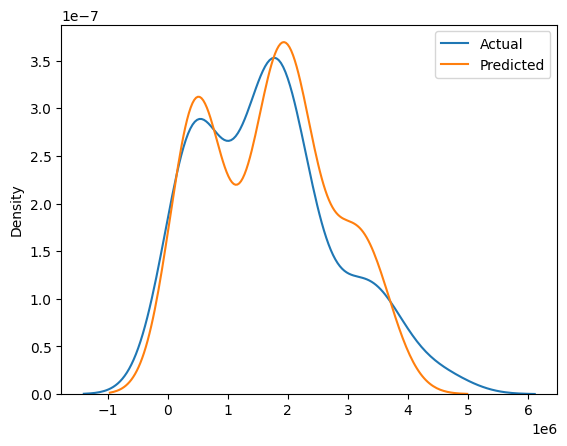

In [ ]:
# Visualisasi Hasil Prediksi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_RFReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
# Memeriksa Akurasi Pengujian dan Pelatihan Algoritma Regresi
print('Random Forest Regression')
RFReg_model_train = RFReg_model.score(x_train,y_train)*100
RFReg_model_test = RFReg_model.score(x_test, y_test)*100

# Menjalankan Algoritma dengan Membagi 10 Sampel Data Acak
RFReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

# Menampilkan Hasil Nilai Algoritma
print('Train : ',RFReg_model_train)
print('Test  : ',RFReg_model_test, '\n')
print('The Average Cross Validation Score is',
      np.round(np.mean(RFReg_model_score)*100,2))

Random Forest Regression
Train :  97.47517414251053
Test  :  86.37724010302279 

The Average Cross Validation Score is 83.0


Model saved successfully.


Skor Validasi Akhir = 83.0

C. Gradient Boosting

In [ ]:
# Membuat Algoritma Regresi
from sklearn.ensemble import GradientBoostingRegressor
GBReg = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=0)
GBReg.fit(x_train, y_train.ravel())

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=0)

In [ ]:
# Membuat Prediksi Algoritma Regresi
ypred_GBReg = sc.inverse_transform(GBReg.predict(x_test).reshape(-1,1))
y_pred_GBReg = pd.DataFrame(ypred_GBReg)
y_pred_GBReg.tail()

,0
63,4.216658e+05
64,1.919787e+06
65,3.221704e+06
66,1.802274e+06
67,2.337136e+06


<ipython-input-143-3c5ee1e0b17b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-143-3c5ee1e0b17b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_GBReg,hist=False,label='Predicted')


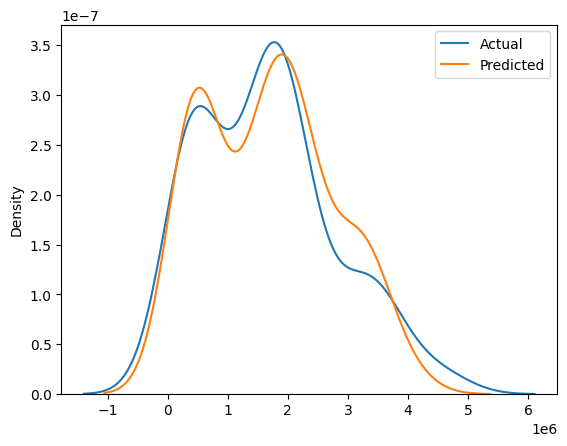

In [ ]:
# Visualisasi Hasil Prediksi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_GBReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
# Memeriksa Akurasi Pengujian dan Pelatihan Algoritma Regresi
print('Gradient Boosting Regression')
GBReg_train = GBReg.score(x_train,y_train.ravel())*100
GBReg_test = GBReg.score(x_test, y_test)*100

# Menjalankan Algoritma dengan Membagi 10 Sampel Data Acak
GBReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
GBReg_score = cross_val_score(GBReg,x,y,cv=GBReg_cv)

# Menampilkan Hasil Nilai Algoritma
print('Train : ',GBReg_train)
print('Test  : ',GBReg_test, '\n')
print('The Average Cross Validation Score is',
      np.round(np.mean(GBReg_score)*100,2))

Gradient Boosting Regression


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Train :  99.99976363346896
Test  :  85.98294460533783 

The Average Cross Validation Score is 83.25


In [ ]:
# Membuat Hyperparameter Tuning pada Algoritma yang Digunakan
GBReg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Membuat Hyperparameter Tuning
param_grid = {'subsample' : np.arange(0.1, 1.1),
              'max_depth': np.arange(1,11),
              'min_samples_leaf': np.arange(1, 11),
              'min_samples_split': np.arange(2, 11),
              'n_estimators': [500, 1000, 2000],
              'learning_rate': [0.001, 0.01, 0.1] }

GBReg_tuning = GradientBoostingRegressor()

GBReg_search = RandomizedSearchCV(GBReg_tuning, param_grid, cv = 10, scoring='r2')

GBReg_best_model = GBReg_search.fit(x_train, y_train.ravel())
print('Optimum parameters', GBReg_best_model.best_params_)
print('Best score is {}'.format(GBReg_best_model.best_score_))

Optimum parameters {'subsample': 0.1, 'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': 10, 'learning_rate': 0.01}
Best score is 0.8163990458197604


In [ ]:
# Memasukkan Model Algoritma yang Sudah Dimodifikasi dengan Hyperparameter
GBReg_model = GradientBoostingRegressor(subsample= 0.1, n_estimators= 2000,
                                        min_samples_split= 9,
                                        min_samples_leaf= 1,
                                        max_depth= 10, learning_rate= 0.01,
                                        random_state= 0)
GBReg_model.fit(x_train, y_train.ravel())

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_split=9,
                          n_estimators=2000, random_state=0, subsample=0.1)

In [ ]:
# Membuat Prediksi Algoritma Regresi yang Dimodifikasi
ypred_GBReg_model = sc.inverse_transform(GBReg_model.predict(x_test).reshape(-1,1))
ypred_GBReg_model = pd.DataFrame(ypred_GBReg_model)
ypred_GBReg_model.tail()

,0
63,3.098038e+05
64,2.164963e+06
65,2.515733e+06
66,2.059401e+06
67,1.619067e+06


<ipython-input-149-17e39356eb31>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-149-17e39356eb31>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_GBReg_model,hist=False,label='Predicted')


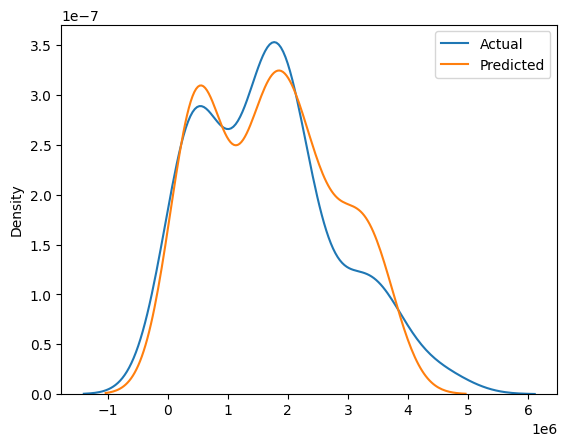

In [ ]:
# Visualisasi Hasil Prediksi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_GBReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
# Memeriksa Akurasi Pengujian dan Pelatihan Algoritma Regresi
print('Gradient Boosting Regression')
GBReg_model_train = GBReg_model.score(x_train,y_train.ravel())*100
GBReg_model_test = GBReg_model.score(x_test, y_test.ravel())*100

# Menjalankan Algoritma dengan Membagi 10 Sampel Data Acak
GBReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
GBReg_model_score = cross_val_score(GBReg_model,x,y,cv=GBReg_model_cv)

# Menampilkan Hasil Nilai Algoritma
print('Train : ',GBReg_model_train)
print('Test  : ',GBReg_model_test, '\n')
print('The Average Cross Validation Score is',
      np.round(np.mean(GBReg_model_score)*100,2))

Gradient Boosting Regression


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Train :  91.67962894437088
Test  :  86.20834231739471 

The Average Cross Validation Score is 83.96


Skor Validasi Akhir = 83.96

D. Support Vector Regressor

In [ ]:
# Membuat Algoritma Regresi
from sklearn.svm import SVR
SVReg = SVR(gamma = 1)
SVReg.fit(x_train, y_train.ravel())

SVR(gamma=1)

In [ ]:
# Membuat Prediksi Algoritma Regresi
ypred_SVReg = sc.inverse_transform(SVReg.predict(x_test).reshape(-1,1))
y_pred_SVReg = pd.DataFrame(ypred_SVReg)
y_pred_SVReg.tail()

,0
63,1.086560e+06
64,1.757398e+06
65,1.915177e+06
66,1.690874e+06
67,1.815422e+06


<ipython-input-153-c03ae046bec1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-153-c03ae046bec1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_SVReg,hist=False,label='Predicted')


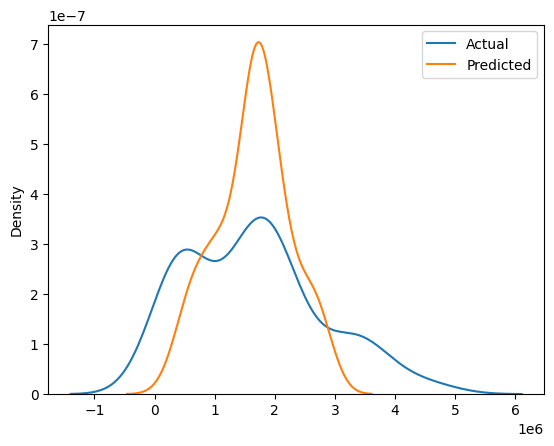

In [ ]:
# Visualisasi Hasil Prediksi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_SVReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
# Memeriksa Akurasi Pengujian dan Pelatihan Algoritma Regresi
print('Support Vector Regression')
SVReg_train = SVReg.score(x_train,y_train.ravel())*100
SVReg_test = SVReg.score(x_test, y_test)*100

# Menjalankan Algoritma dengan Membagi 10 Sampel Data Acak
SVReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
SVReg_score = cross_val_score(SVReg,x,y,cv=SVReg_cv)

# Menampilkan Hasil Nilai Algoritma
print('Train : ',SVReg_train)
print('Test  : ',SVReg_test, '\n')
print('The Average Cross Validation Score is',
      np.round(np.mean(SVReg_score)*100,2))

Support Vector Regression
Train :  92.62509041219276
Test  :  60.81422434326272 

The Average Cross Validation Score is -7.15


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
# Membuat Hyperparameter Tuning pada Algoritma yang Digunakan
SVReg.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# Membuat Hyperparameter Tuning
param_grid = {'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'C': [0.1, 1, 10, 100, 1000],
              'epsilon': [0.001, 0.01, 0.1]}

SVReg_tuning = SVR()

SVReg_search = GridSearchCV(SVReg_tuning, param_grid, cv = 10, scoring='r2')

SVReg_best_model = SVReg_search.fit(x_train, y_train.ravel())
print('Optimum parameters', SVReg_best_model.best_params_)
print('Best score is {}'.format(SVReg_best_model.best_score_))

Optimum parameters {'C': 1, 'epsilon': 0.1, 'gamma': 0.1}
Best score is 0.8410602764707769


In [ ]:
# Memasukkan Model Algoritma yang Sudah Dimodifikasi dengan Hyperparameter
SVReg_model = SVR(C= 1, epsilon= 0.1, gamma= 0.1)
SVReg_model.fit(x_train, y_train.ravel())

SVR(C=1, gamma=0.1)

In [ ]:
# Membuat Prediksi Algoritma Regresi yang Dimodifikasi
ypred_SVReg_model = sc.inverse_transform(SVReg_model.predict(x_test).reshape(-1,1))
ypred_SVReg_model = pd.DataFrame(ypred_SVReg_model)
ypred_SVReg_model.tail()

,0
63,5.679776e+05
64,1.665946e+06
65,2.256916e+06
66,1.687524e+06
67,1.495696e+06


<ipython-input-159-84a0315a0548>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-159-84a0315a0548>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_SVReg_model,hist=False,label='Predicted')


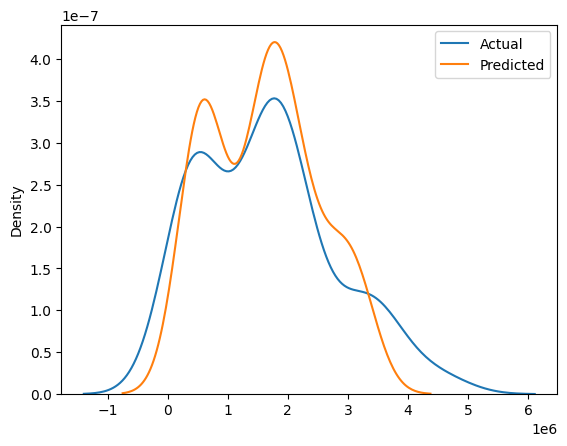

In [ ]:
# Visualisasi Hasil Prediksi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_SVReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
# Memeriksa Akurasi Pengujian dan Pelatihan Algoritma Regresi
print('Support Vector Regression')
SVReg_model_train = SVReg_model.score(x_train,y_train.ravel())*100
SVReg_model_test = SVReg_model.score(x_test, y_test)*100

# Menjalankan Algoritma dengan Membagi 10 Sampel Data Acak
SVReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
SVReg_model_score = cross_val_score(SVReg,x,y,cv=SVReg_model_cv)

# Menampilkan Hasil Nilai Algoritma
print('Train : ',SVReg_model_train)
print('Test  : ',SVReg_model_test, '\n')
print('The Average Cross Validation Score is',
      np.round(np.mean(SVReg_model_score)*100,2))

Support Vector Regression
Train :  87.44905125649251
Test  :  84.19387590969212 

The Average Cross Validation Score is -7.15


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Skor Validasi Akhir = -7.15

E. Decision Tree Regressor

In [ ]:
# Membuat Algoritma Regresi
from sklearn.tree import DecisionTreeRegressor
DTreeReg = DecisionTreeRegressor(random_state = 0)
DTreeReg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
# Membuat Prediksi Algoritma Regresi
ypred_DTreeReg = sc.inverse_transform(DTreeReg.predict(x_test).reshape(-1,1))
y_pred_DTreeReg = pd.DataFrame(ypred_DTreeReg)
y_pred_DTreeReg.tail()

,0
63,4.256516e+05
64,1.916811e+06
65,1.826944e+06
66,1.827549e+06
67,2.392152e+06


<ipython-input-163-951afc5ab22c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-163-951afc5ab22c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_DTreeReg,hist=False,label='Predicted')


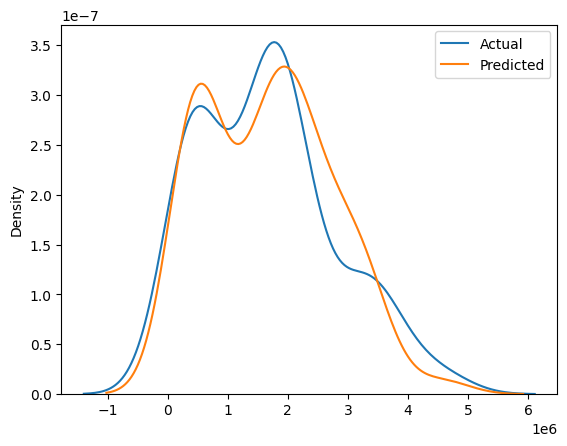

In [ ]:
# Visualisasi Hasil Prediksi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_DTreeReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
# Memeriksa Akurasi Pengujian dan Pelatihan Algoritma Regresi
print('Decision Tree Regression')
DTreeReg_train = DTreeReg.score(x_train,y_train)*100
DTreeReg_test = DTreeReg.score(x_test, y_test)*100

# Menjalankan Algoritma dengan Membagi 10 Sampel Data Acak
DTreeReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
DTreeReg_score = cross_val_score(DTreeReg,x,y,cv=DTreeReg_cv)

# Menampilkan Hasil Nilai Algoritma
print('Train : ',DTreeReg_train)
print('Test  : ',DTreeReg_test, '\n')
print('The Average Cross Validation Score is',
      np.round(np.mean(DTreeReg_score)*100,2))

Decision Tree Regression
Train :  100.0
Test  :  73.21934331853251 

The Average Cross Validation Score is 64.39


In [ ]:
# Membuat Hyperparameter Tuning pada Algoritma yang Digunakan
DTreeReg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Definisi parameter grid (tidak termasuk 'auto' untuk max_features)
param_grid = {'splitter': ['best', 'random'],
              'max_depth': np.arange(1, 11),
              'min_samples_leaf': np.arange(1, 11),
              'min_samples_split': np.arange(2, 11),
              'max_features': ['sqrt', 'log2', None]}

# Buat objek Decision Tree Regressor
DTreeReg_tuning = DecisionTreeRegressor(random_state=0)

# Lakukan pencarian acak dengan cross-validation
DTreeReg_search = RandomizedSearchCV(DTreeReg_tuning, param_grid, cv=10, scoring='r2', n_iter=100)

# Fit model dengan tuning hyperparameter
DTreeReg_best_model = DTreeReg_search.fit(x_train, y_train)

# Tampilkan hasil
print('Parameter Terbaik:', DTreeReg_best_model.best_params_)
print('Skor Terbaik adalah {}'.format(DTreeReg_best_model.best_score_))

Parameter Terbaik: {'splitter': 'random', 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 8}
Skor Terbaik adalah 0.84090249759737


<ipython-input-167-17028b93439c>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-167-17028b93439c>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_DTreeReg_tuned,hist=False,label='Predicted')


Decision Tree Regression Tuned
Train :  94.02522738011442
Test :  81.32365291971105 

Cross Validation Score:
Fold 1: 0.11
Fold 2: 0.93
Fold 3: 0.73
Fold 4: 0.34
Fold 5: 0.61
Fold 6: 0.91
Fold 7: 0.80
Fold 8: 0.61
Fold 9: 0.50
Fold 10: 0.89


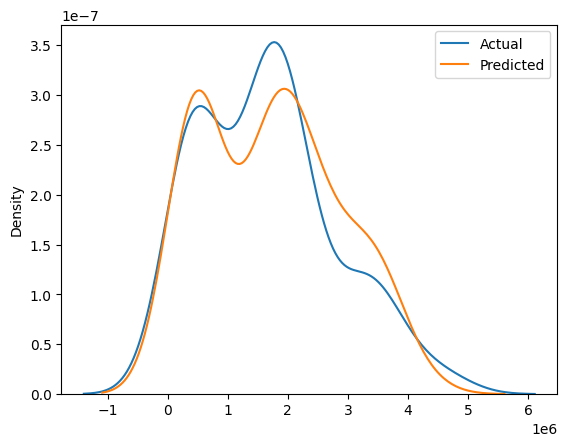

In [ ]:
# Evaluasi model dengan hyperparameter terbaik
DTreeReg_tuned = DecisionTreeRegressor(**DTreeReg_best_model.best_params_)
DTreeReg_tuned.fit(x_train, y_train)

# Membuat Prediksi Algoritma Regresi
ypred_DTreeReg_tuned = sc.inverse_transform(DTreeReg_tuned.predict(x_test).reshape(-1,1))
y_pred_DTreeReg_tuned = pd.DataFrame(ypred_DTreeReg_tuned)
y_pred_DTreeReg_tuned.tail()

# Visualisasi Hasil Prediksi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_DTreeReg_tuned,hist=False,label='Predicted')
plt.legend()

# Memeriksa Akurasi Pengujian dan Pelatihan Algoritma Regresi
print('Decision Tree Regression Tuned')
DTreeReg_tuned_train = DTreeReg_tuned.score(x_train,y_train)*100
DTreeReg_tuned_test = DTreeReg_tuned.score(x_test, y_test)*100

# Menampilkan Hasil Nilai Algoritma
print('Train : ',DTreeReg_tuned_train)
print('Test : ',DTreeReg_tuned_test, '\n')

# Menampilkan Skor Cross-Validation
print('Cross Validation Score:')
for i, score in enumerate(DTreeReg_score):
  print(f'Fold {i+1}: {score:.2f}')

In [ ]:
# Membandingkan Performa Model
print('Perbandingan Performa Model:')
print('-' * 50)
print('Model | Train Accuracy | Test Accuracy')
print('-' * 50)
print(f'Default | {DTreeReg_train:.2f} | {DTreeReg_test:.2f}')
print(f'Tuned   | {DTreeReg_tuned_train:.2f} | {DTreeReg_tuned_test:.2f}')
print('-' * 50)

Perbandingan Performa Model:
--------------------------------------------------
Model | Train Accuracy | Test Accuracy
--------------------------------------------------
Default | 100.00 | 73.22
Tuned   | 94.03 | 81.32
--------------------------------------------------


F. K-Nearest Neighbors Regressor

In [ ]:
# Membuat Algoritma Regresi
from sklearn.neighbors import KNeighborsRegressor
KNNReg = KNeighborsRegressor(n_neighbors=1)
KNNReg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
# Membuat Prediksi Algoritma Regresi
ypred_KNNReg = sc.inverse_transform(KNNReg.predict(x_test).reshape(-1,1))
y_pred_KNNReg = pd.DataFrame(ypred_KNNReg)
y_pred_KNNReg.tail()

,0
63,4.256516e+05
64,1.783884e+06
65,4.178500e+06
66,1.826944e+06
67,1.455769e+06


<ipython-input-171-5404ac9025a6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-171-5404ac9025a6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_KNNReg,hist=False,label='Predicted')


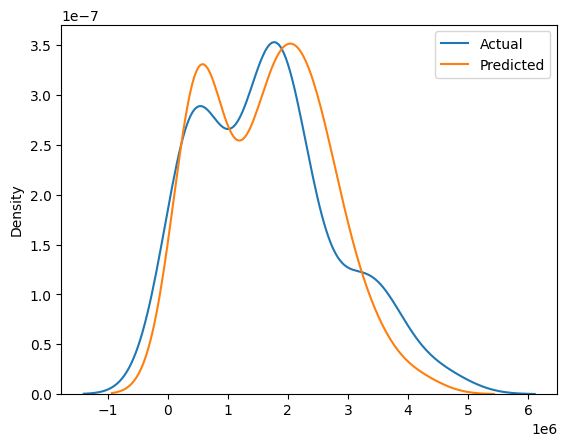

In [ ]:
# Visualisasi Hasil Prediksi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_KNNReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
# Memeriksa Akurasi Pengujian dan Pelatihan Algoritma Regresi
print('K-Nearest Neighbors Regression')
KNNReg_train = KNNReg.score(x_train,y_train)*100
KNNReg_test = KNNReg.score(x_test, y_test)*100

# Menjalankan Algoritma dengan Membagi 10 Sampel Data Acak
KNNReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
KNNReg_score = cross_val_score(KNNReg,x,y,cv=KNNReg_cv)

# Menampilkan Hasil Nilai Algoritma
print('Train : ',KNNReg_train)
print('Test  : ',KNNReg_test, '\n')
print('The Average Cross Validation Score is',
      np.round(np.mean(KNNReg_score)*100,2))

K-Nearest Neighbors Regression
Train :  100.0
Test  :  86.62185171553706 

The Average Cross Validation Score is 71.02


In [ ]:
# Membuat Hyperparameter Tuning pada Algoritma yang Digunakan
KNNReg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# Membuat Hyperparameter Tuning
param_grid = {'n_neighbors': np.arange(1, 10)}

KNNReg_tuning = KNeighborsRegressor()

KNNReg_search = GridSearchCV(KNNReg_tuning, param_grid, cv=10, scoring='r2')

KNNReg_best_model = KNNReg_search.fit(x_train, y_train)
print('Optimum parameters', KNNReg_best_model.best_params_)
print('Best score is {}'.format(KNNReg_best_model.best_score_))

Optimum parameters {'n_neighbors': 3}
Best score is 0.8140455477131845


In [ ]:
# Memasukkan Model Algoritma yang Sudah Dimodifikasi dengan Hyperparameter
KNNReg_model = KNeighborsRegressor(n_neighbors= 3)
KNNReg_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Membuat Prediksi Algoritma Regresi yang Dimodifikasi
ypred_KNNReg_model = sc.inverse_transform(KNNReg_model.predict(x_test).reshape(-1,1))
ypred_KNNReg_model = pd.DataFrame(ypred_KNNReg_model)
ypred_KNNReg_model.tail()

,0
63,4.901651e+05
64,1.896004e+06
65,3.117505e+06
66,2.037919e+06
67,1.721345e+06


<ipython-input-177-e9a34f598b05>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-177-e9a34f598b05>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_KNNReg_model,hist=False,label='Predicted')


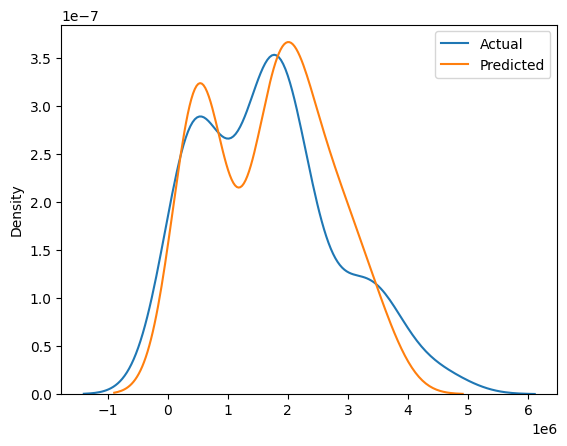

In [ ]:
# Visualisasi Hasil Prediksi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_KNNReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
# Memeriksa Akurasi Pengujian dan Pelatihan Algoritma Regresi
print('K-Nearest Neighbors Regression')
KNNReg_model_train = KNNReg_model.score(x_train,y_train)*100
KNNReg_model_test = KNNReg_model.score(x_test, y_test)*100

# Menjalankan Algoritma dengan Membagi 10 Sampel Data Acak
KNNReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
KNNReg_model_score = cross_val_score(KNNReg_model,x,y,cv=KNNReg_model_cv)

# Menampilkan Hasil Nilai Algoritma
print('Train : ',KNNReg_model_train)
print('Test  : ',KNNReg_model_test, '\n')
print('The Average Cross Validation Score is',
      np.round(np.mean(KNNReg_model_score)*100,2))

K-Nearest Neighbors Regression
Train :  89.6868897055617
Test  :  86.28672507954892 

The Average Cross Validation Score is 77.2


4. Evaluation

In [ ]:
# Model Evaluasi MAE & MSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
# Model Algoritma yang Digunakan
results= pd.DataFrame(columns=['R2-score','Mean Absolute Error','Mean Squared Error'])

# Regresi Linear
results.loc['Linear Regression']=[r2_score(sc.inverse_transform(y_test),ypred_LinReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_LinReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_LinReg_model)]
# Random Forest Regressor
results.loc['Random Forest']=[r2_score(sc.inverse_transform(y_test),ypred_RFReg_model)*100,
                              mean_absolute_error(sc.inverse_transform(y_test),ypred_RFReg_model),
                              mean_squared_error(sc.inverse_transform(y_test),y_pred_RFReg)]
# Gradient Boosting
results.loc['Gradient Boosting']=[r2_score(sc.inverse_transform(y_test),ypred_GBReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_GBReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_GBReg_model)]
# SVR
results.loc['SVR']=[r2_score(sc.inverse_transform(y_test),ypred_SVReg_model)*100,
                    mean_absolute_error(sc.inverse_transform(y_test),ypred_SVReg_model),
                    mean_squared_error(sc.inverse_transform(y_test),ypred_SVReg_model)]
# Decision Tree
results.loc['Decision Tree']=[r2_score(sc.inverse_transform(y_test),y_pred_DTreeReg_tuned)*100,
                              mean_absolute_error(sc.inverse_transform(y_test),y_pred_DTreeReg_tuned),
                              mean_squared_error(sc.inverse_transform(y_test),y_pred_DTreeReg_tuned)]
# K-Neighbors
results.loc['K-Neighbors']=[r2_score(sc.inverse_transform(y_test),ypred_KNNReg_model)*100,
                            mean_absolute_error(sc.inverse_transform(y_test),ypred_KNNReg_model),
                            mean_squared_error(sc.inverse_transform(y_test),ypred_KNNReg_model)]

# Sorts models based on R2-score
results.sort_values('R2-score',ascending=False).style.background_gradient(
    cmap='Purples', subset=['R2-score'])

,R2-score,Mean Absolute Error,Mean Squared Error
Linear Regression,86.895666,261049.168107,160199780301.228729
Random Forest,86.377240,224668.555252,177505334097.156494
K-Neighbors,86.286725,269658.437076,167644049255.577728
Gradient Boosting,86.208342,265741.634590,168602274312.363312
SVR,84.193876,284771.942122,193229017933.827148
Decision Tree,81.323653,273189.614013,228317339804.286041


In [ ]:
# LIME
import lime
import lime.lime_tabular

# Membuat objek LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Produksi'],
    mode='regression'
)

In [ ]:
# Memilih satu instance dari data uji untuk dijelaskan
i = 2  # atau pilih indeks lain dari data uji
exp = explainer.explain_instance(X_test.iloc[i], RFReg.predict, num_features=4)

In [ ]:
for i in range(4):
    print(f"{exp.as_list()[i][0]}: {exp.as_list()[i][1]:.2f}")

Kelembapan > 83.97: 0.00
1797.25 < Curah hujan <= 2376.00: 0.00
Luas Panen <= 147470.75: 0.00
Suhu rata-rata <= 26.12: 0.00


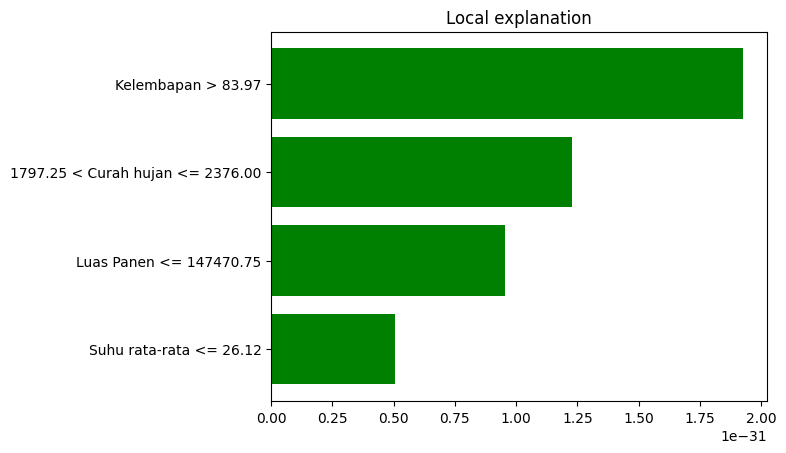

In [ ]:
from lime import lime_tabular

fig = exp.as_pyplot_figure()

In [ ]:
# Menampilkan hasil penjelasan
exp.show_in_notebook(show_table=True)

**Simpan Model**

In [ ]:
import pickle

from sklearn.base import is_classifier

filename = 'PredPadi_model.sav'
pickle.dump(is_classifier, open(filename, 'wb'))

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model_randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
model_randomforest.fit(X_train, y_train)

# Save the model to a file using pickle
with open('model_file.pkl', 'wb') as model_file:
    pickle.dump(model_randomforest, model_file)

print("Model saved successfully.")

Model saved successfully.
